In [125]:
import numpy as np

In [126]:
A = np.diag(list(range(102,111)), -1) + np.diag(list(range(1,11)), 0) + np.diag(list(range(11,20)), 1)

In [127]:
A

array([[  1,  11,   0,   0,   0,   0,   0,   0,   0,   0],
       [102,   2,  12,   0,   0,   0,   0,   0,   0,   0],
       [  0, 103,   3,  13,   0,   0,   0,   0,   0,   0],
       [  0,   0, 104,   4,  14,   0,   0,   0,   0,   0],
       [  0,   0,   0, 105,   5,  15,   0,   0,   0,   0],
       [  0,   0,   0,   0, 106,   6,  16,   0,   0,   0],
       [  0,   0,   0,   0,   0, 107,   7,  17,   0,   0],
       [  0,   0,   0,   0,   0,   0, 108,   8,  18,   0],
       [  0,   0,   0,   0,   0,   0,   0, 109,   9,  19],
       [  0,   0,   0,   0,   0,   0,   0,   0, 110,  10]])

In [128]:
x = np.zeros(10) + 1

In [129]:
x

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [130]:
b = np.dot(A,x)

In [131]:
b

array([ 12., 116., 119., 122., 125., 128., 131., 134., 137., 120.])

# Thomas algorithm

In this case we don't solve using the default LU-factorization provided by numpy since it is not optimal given the fact that the matrix is tridiagonal. We will use the better thomas algorithm.

In [132]:
def thomas_lu(A, b):
    """
    Performs thomas algorithm on tridiagonal matrix A with results b
    Returns the variable vector x
    """
    size = np.shape(b)[0]
    e = np.diag(A, k=-1)
    a = np.diag(A, k=0)
    c = np.diag(A, k=1)
    alpha = np.zeros(size)
    beta = np.zeros(size - 1)
    alpha[0] = a[0]
    for i in range(size - 1):
        beta[i] = e[i]/alpha[i]
        alpha[i + 1] = a[i + 1] - beta[i] * c[i]
    L = np.diag(np.zeros(size) + 1, k=0) + np.diag(beta, k=-1)
    U = np.diag(alpha, k=0) + np.diag(c, k=1)
    y = np.zeros(size)
    x = np.zeros(size)
    y[0] = b[0]
    for i in range(1,size):
        y[i] = b[i] - beta[i - 1] * y[i - 1]
    x[size - 1] = y[size - 1]/alpha[size - 1]
    for i in range(size - 2, -1, -1):
        x[i] = (y[i] - c[i] * x[i + 1])/alpha[i]
    return x

In [133]:
x = thomas_lu(A,b)

In [134]:
print(x)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# 2. Condition Number

Since the matrix A has three eigenvalues $\rho = (1, 1, \epsilon)$ and we know that the condition number $K$ is defined as $\frac{\lambda_{max}}{\lambda_{min}}$, we know that $K = \frac{1}{\epsilon}$

$$K_p(A) = \|A\|_p \times \|A^{-1}\|_p$$

We have that:

$K_1(A) = 1 \times \frac{1}{\epsilon} = \frac{1}{\epsilon}$ for $\epsilon << 1$

$K_2(A) = 1 \times \frac{1}{\epsilon} = \frac{1}{\epsilon}$ for $\epsilon << 1$

$K_\infty = 1 \times \frac{1}{\epsilon}= \frac{1}{\epsilon}$ for $\epsilon << 1$

With perturbation term $[0,0,\alpha]^T$, the solution becomes $[1, 0, \frac{\alpha}{\epsilon}]$

With perturbation term $[\alpha, 0, 0]^T$, the solution becomes $[1 + \alpha, 0, 0]$

In the first case, we obtain a perturbation of a factor of $10^{-6}$ if $\alpha = 10^{-12}$ and $\epsilon = 10^{-6}$ and a perturbation factor of 1 in the other case, in the second one we obtain a  perturbation factor of at most $\alpha$.

# 3. Fill-in Phenomenon

In [22]:
B = np.array([[-4, 1, 0, 0],[1, -4, 1, 0],[0, 1, -4, 1],[0, 0, 1, -4]])
B

array([[-4,  1,  0,  0],
       [ 1, -4,  1,  0],
       [ 0,  1, -4,  1],
       [ 0,  0,  1, -4]])

In [24]:
I = np.eye(4)
I

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [31]:
Z = np.zeros([4,4])
Z

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [32]:
A = np.block([[B, I, Z, Z],[I, B, I, Z],[Z, I, B, I],[Z, Z, I, B]])
A

array([[-4.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 1., -4.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  1., -4.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  1., -4.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 1.,  0.,  0.,  0., -4.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  1., -4.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  1., -4.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  1., -4.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0., -4.,  1.,  0.,  0.,  1.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1., -4.,  1.,  0.,  0.,
         1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0

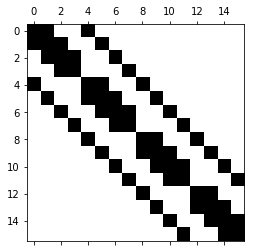

In [42]:
import scipy
import scipy.linalg
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix

P, L, U = scipy.linalg.lu(A)

plt.spy(A)

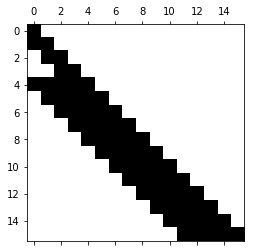

In [43]:
plt.spy(L)

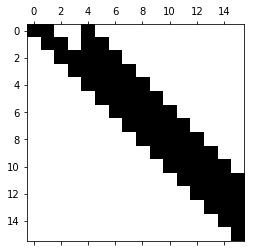

In [44]:
plt.spy(U)